['Line', 'Line', 'Pie', 'Vertical Bar', 'Pie', 'Horizontal Bar', 'Line', 'Line', 'Dot Line', 'Dot Line', 'Horizontal Bar', 'Line', 'Pie', 'Vertical Bar', 'Vertical Bar', 'Horizontal Bar', 'Line', 'Dot Line', 'Horizontal Bar', 'Line', 'Horizontal Bar', 'Dot Line', 'Vertical Bar', 'Horizontal Bar', 'Horizontal Bar', 'Pie', 'Dot Line', 'Vertical Bar', 'Dot Line', 'Horizontal Bar', 'Horizontal Bar', 'Dot Line', 'Dot Line', 'Horizontal Bar', 'Dot Line', 'Horizontal Bar', 'Line', 'Line', 'Line', 'Line', 'Line', 'Vertical Bar', 'Dot Line', 'Pie', 'Dot Line', 'Pie', 'Horizontal Bar', 'Dot Line', 'Dot Line', 'Line', 'Horizontal Bar', 'Vertical Bar', 'Pie', 'Line', 'Vertical Bar', 'Pie', 'Vertical Bar', 'Horizontal Bar', 'Pie', 'Dot Line', 'Dot Line', 'Vertical Bar', 'Vertical Bar', 'Line', 'Pie', 'Pie', 'Dot Line', 'Pie', 'Vertical Bar', 'Vertical Bar', 'Line', 'Dot Line', 'Vertical Bar', 'Pie', 'Pie', 'Dot Line', 'Pie', 'Pie', 'Line', 'Horizontal Bar', 'Horizontal Bar', 'Dot Line', 'Line', 'Li

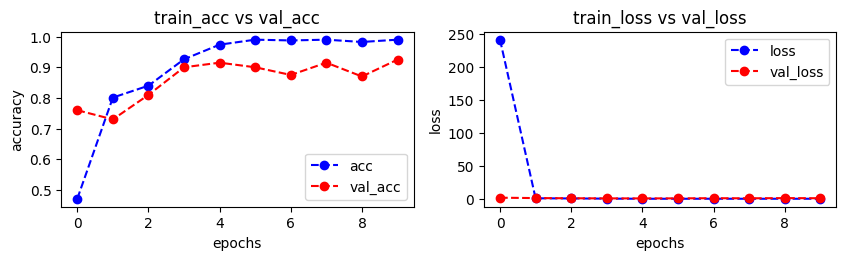

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline


import os
import cv2
from keras.layers import Dense, Flatten

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2


####### Training Path to your image folders
train_path = 'train_val/'
val_path = 'test/'


# If we choose an image size that is too small, our model will not be able to pick up on the distinctive features that help with image recognition.

# Conversely, if our images are too big, it increases the computational resources required by our computer and
# our model might not be sophisticated enough to process them

# As Current training Image dimension is 32 by 32 
imageSize = (128, 128)

# Create empty lists for the Train images and  Train labels
train_Images = []
train_numberLabels = []

# Create empty lists for the Test images and  Test labels
test_Images = []
test_numberLabels = []


df = pd.read_csv("train_val.csv")
df.head()

# define some classes from the images we have observed

image_type_class = ["Line", "Dot Line", "Horizontal Bar", "Vertical Bar", 'Pie']

# map the categories to the labels array i.e y_train
image_type = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}



def plot_accuracy_loss(history):

  # Plot the accuracy and the loss during the training of the nn.
  fig = plt.figure(figsize=(10,5))
  # Plot accuracy
  plt.subplot(221)

  plt.plot(history.history['accuracy'],'bo--',label= "acc")

  plt.plot(history.history['val_accuracy'],'ro--',label= "val_acc")

  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()
 

  # PLot Loss functton
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--',label= "loss")

  plt.plot(history.history['val_loss'],'ro--',label= "val_loss")

  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")
  plt.legend()
  plt.show()



def load_data(sourcePath = '',labelArray = [],imageArray = []) :

  # Loop over each folder from '0' to '9'

    number_folder = os.path.join(sourcePath)
    # Loop over each image in the folder
    for file in os.listdir(number_folder):
      file_path = os.path.join(number_folder, file)
      if file_path.endswith(('.png')):
        # read the image i graay scale and resize it to the imageSize size
        img = cv2.imread(file_path)
        img = cv2.resize(img, imageSize)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # Append the image and label to the lists
        imageArray.append(img)
        name_type = df.at[int(os.path.splitext(file)[0]),'type']
        # print(os.path.splitext(file)[0]+ " " + name)
        # print(image_type_class[image_type[name_type]] + "   --->" + name_type)
        labelArray.append(image_type_class[image_type[name_type]])
        
       

# Loading Traiing dataset
df.head()
load_data(train_path,train_numberLabels,train_Images)

# Convert the lists to NumPy arrays

train_Images = np.array(train_Images)
print(train_numberLabels)
train_numberLabels = np.array(train_numberLabels)

le = LabelEncoder()
train_numberLabels = le.fit_transform(train_numberLabels)

# Save the arrays in NumPy format
np.save('image_train.npy', train_Images)
np.save('label_train.npy', train_numberLabels)


image_train = np.load('image_train.npy')
label_train = np.load('label_train.npy')


# Loading Testing dataset
load_data(val_path,test_numberLabels,test_Images)


# Convert the lists to NumPy arrays
test_Images = np.array(test_Images)
test_numberLabels = np.array(test_numberLabels)
le = LabelEncoder()
test_numberLabels = le.fit_transform(test_numberLabels)


# Save the arrays in NumPy format
np.save('image_test.npy', test_Images)
np.save('label_test.npy', test_numberLabels)


image_test = np.load('image_test.npy')
label_test = np.load('label_test.npy')


model = keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense (128, activation=tf.nn.relu),
tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

from sklearn.model_selection import train_test_split
image_train, image_test, label_train, label_test = train_test_split(image_train, image_test, test_size=0.2, random_state=44)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


history1 = model.fit(image_train, label_train,epochs= 10, validation_data=(image_test, label_test))
plot_accuracy_loss(history1)





In [31]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

# Create a new model with VGG16 as the base
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

from keras.utils import to_categorical

label_train = to_categorical(label_train, num_classes=10)
label_test = to_categorical(label_test, num_classes=10)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(image_train, label_train, epochs=10, batch_size=32, validation_data=(image_test, label_test))

# Evaluate the model
score = model.evaluate(image_test, label_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
25/25 [==============================] - 198s 8s/step - loss: 7.2222 - accuracy: 0.6513 - val_loss: 0.0270 - val_accuracy: 0.9850
Epoch 2/10
25/25 [==============================] - 199s 8s/step - loss: 0.2060 - accuracy: 0.9725 - val_loss: 0.1813 - val_accuracy: 0.9800
Epoch 3/10
25/25 [==============================] - 201s 8s/step - loss: 0.0613 - accuracy: 0.9925 - val_loss: 0.0988 - val_accuracy: 0.9900
Epoch 4/10
25/25 [==============================] - 197s 8s/step - loss: 0.0354 - accuracy: 0.9925 - val_loss: 0.0854 - val_accuracy: 0.9950
Epoch 5/10
25/25 [==============================] - 197s 8s/step - loss: 0.1407 - accuracy: 0.9850 - val_loss: 0.0793 - val_accuracy: 0.9950
Epoch 6/10
25/25 [==============================] - 192s 8s/step - loss: 0.0242 - accuracy: 0.9950 - val_loss: 0.1026 - val_accuracy: 0.9950
Epoch 7/10
25/25 [==============================] - 193s 8s/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1018 - val_accuracy: 0.9950
Epoch 8/10
25